In [73]:
#packages for editing data sets
import pandas as pd
import numpy as np

#packages for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [74]:
df = pd.read_csv("/content/drive/MyDrive/Dataset - Train.csv")
df.head(6)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product


In [75]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8588,3291,8589
unique,8561,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [76]:
df["emotion_in_tweet_is_directed_at"].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [77]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [78]:
#get rid of duplicate tweets in dataset
df2 = df.drop_duplicates(subset=["tweet_text"])
df2.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8561,3280,8562
unique,8561,9,4
top,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPad,No emotion toward brand or product
freq,1,943,5373


In [79]:
#make a dataset without "I can't tell"
df3 =  df2[df2['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]
df3.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8552,3271,8553
unique,8552,9,3
top,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPad,No emotion toward brand or product
freq,1,939,5373


In [80]:
#make a dataset with only tweets that mention product/company
df_product = df3.dropna(subset=["emotion_in_tweet_is_directed_at"])
df_product.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,3271,3271,3271
unique,3271,9,3
top,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPad,Positive emotion
freq,1,939,2662


In [81]:
emotion_count = df_product["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()
print(emotion_count)
emotion_list = df_product["is_there_an_emotion_directed_at_a_brand_or_product"].unique()
print(emotion_list)

Positive emotion                      2662
Negative emotion                       518
No emotion toward brand or product      91
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product']


([<matplotlib.patches.Wedge at 0x7bc8a1f70550>,
 [Text(-0.9171399250103028, 0.6073338109739126, 'Positive emotion'),
  Text(0.8606259115696775, -0.685071558550537, 'Negative emotion'),
  Text(1.0958013659901136, -0.09601753118155837, 'No emotion toward brand or product')],
 [Text(-0.5002581409147105, 0.33127298780395226, '81.4%'),
  Text(0.4694323154016422, -0.37367539557302015, '15.8%'),
  Text(0.5977098359946073, -0.052373198826304555, '2.8%')])

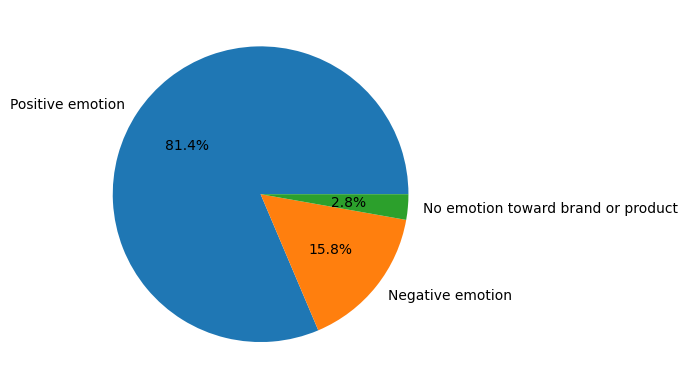

In [82]:
#pie chart for percentage of emotions
emotion_list = ["Positive emotion","Negative emotion","No emotion toward brand or product"]
fig, ax = plt.subplots()
ax.pie(emotion_count,labels=emotion_list,autopct='%1.1f%%')

In [83]:
products = df_product["emotion_in_tweet_is_directed_at"].unique()
print(products)

['iPhone' 'iPad or iPhone App' 'iPad' 'Google' 'Android' 'Apple'
 'Android App' 'Other Google product or service'
 'Other Apple product or service']


In [84]:
#count the emotions for each product
emotion_count_product = df_product.groupby('emotion_in_tweet_is_directed_at')['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().unstack(fill_value=0)
print(emotion_count)


Positive emotion                      2662
Negative emotion                       518
No emotion toward brand or product      91
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


In [85]:
#produce a dictionary with emotion data
product_emotions_dict = {}

for product, row in emotion_count_product.iterrows():
    product_emotions_dict[product] = tuple(row)

print(product_emotions_dict)

{'Android': (8, 1, 68), 'Android App': (8, 1, 71), 'Apple': (95, 21, 541), 'Google': (68, 15, 344), 'Other Apple product or service': (2, 1, 32), 'Other Google product or service': (47, 9, 236), 'iPad': (125, 24, 790), 'iPad or iPhone App': (63, 10, 396), 'iPhone': (102, 9, 184)}


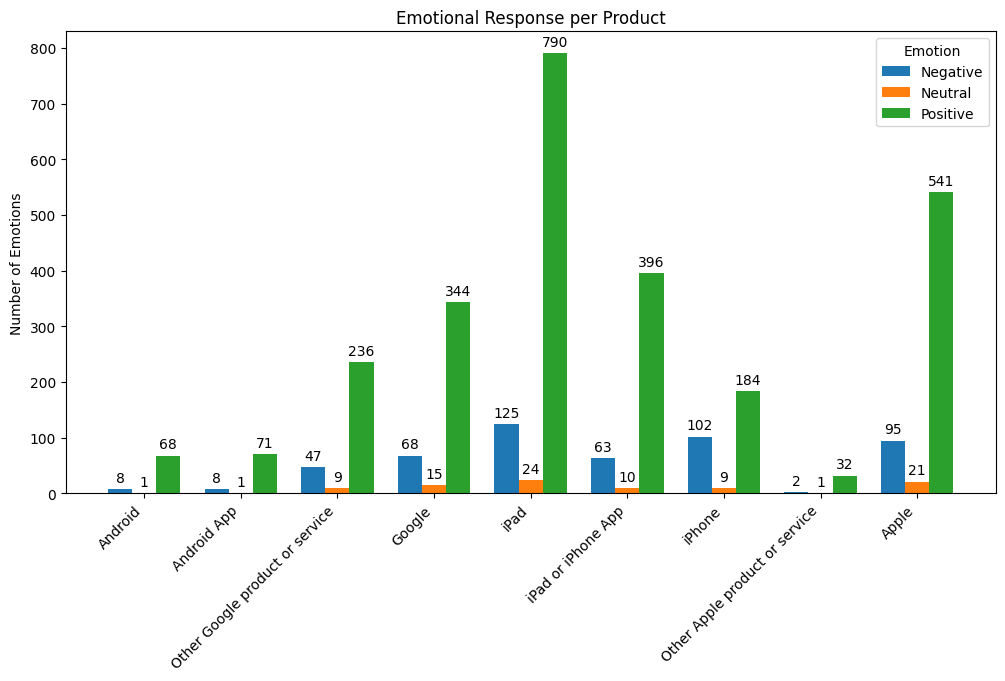

In [86]:
#rearrange data in dictionary

product_emotions_dict = {'Android': (8, 1, 68), 'Android App': (8, 1, 71), 'Other Google product or service': (47, 9, 236), 'Google': (68, 15, 344), 'iPad': (125, 24, 790), 'iPad or iPhone App': (63, 10, 396), 'iPhone': (102, 9, 184), 'Other Apple product or service': (2, 1, 32), 'Apple': (95, 21, 541)}

#produce a chart displaying emotion data

products = list(product_emotions_dict.keys())
x = np.arange(len(products))  # the label locations
width = 0.25  # the width of the bars
emotions = ['Negative','Neutral','Positive']

fig, ax = plt.subplots(figsize=(12, 6))
multiplier = 0

bar_containers = []  # To store bar container objects for the legend

# Create a bar group for each emotion
for i, emotion in enumerate(emotions):
    emotion_values = [product_emotions_dict[product][i] for product in products]
    offset = width * i - (width * (len(emotions)-1) / 2)
    rects = ax.bar(x + offset, emotion_values, width, label=emotion)
    ax.bar_label(rects, padding=3)
    bar_containers.append(rects)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Emotions')
ax.set_title('Emotional Response per Product')
ax.set_xticks(x)
ax.set_xticklabels(products, rotation=45, ha='right')  # Rotate the x-tick labels for better visibility

# Set the legend manually
ax.legend(bar_containers, emotions, title='Emotion')

plt.show()

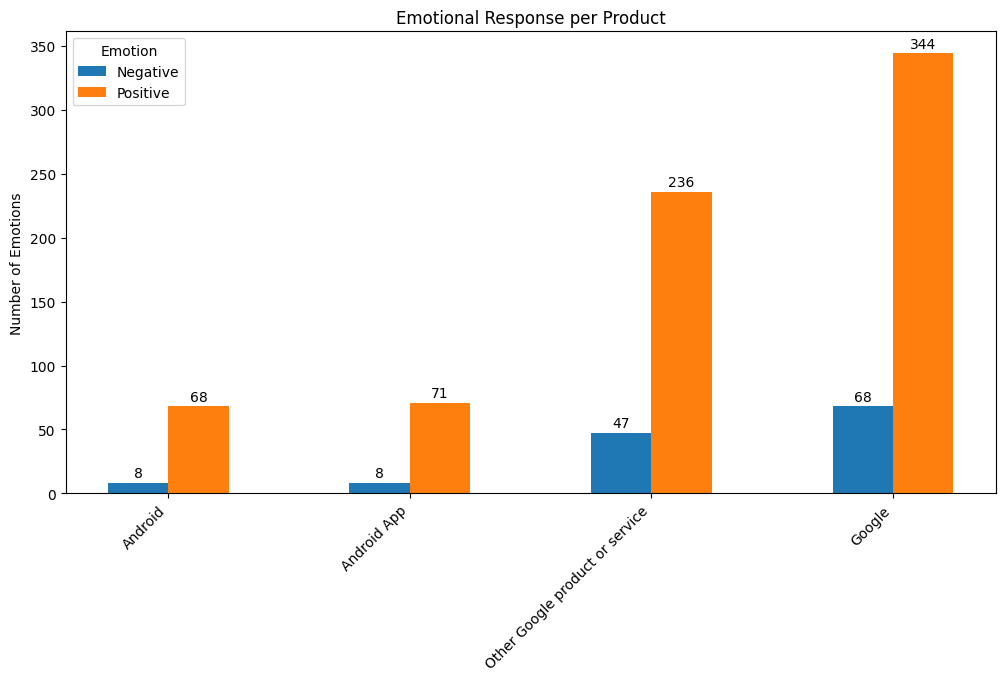

In [87]:
#Separate chart google products and no neutral bar

google_dict = {'Android': (8, 68), 'Android App': (8, 71), 'Other Google product or service': (47, 236), 'Google': (68, 344)}

google_products = list(google_dict.keys())
x = np.arange(len(google_products))  # the label locations
width = 0.25  # the width of the bars
emotions = ['Negative','Positive']

fig, ax = plt.subplots(figsize=(12, 6))
multiplier = 0

bar_containers = []  # To store bar container objects for the legend

# Create a bar group for each emotion
for i, emotion in enumerate(emotions):
    emotion_values = [google_dict[product][i] for product in google_products]
    offset = width * i - (width * (len(emotions)-1) / 2)
    rects = ax.bar(x + offset, emotion_values, width, label=emotion)
    ax.bar_label(rects, padding=2)
    bar_containers.append(rects)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Emotions')
ax.set_title('Emotional Response per Product')
ax.set_xticks(x)
ax.set_xticklabels(google_products, rotation=45, ha='right')  # Rotate the x-tick labels for better visibility

# Set the legend manually
ax.legend(bar_containers, emotions, title='Emotion')

plt.show()

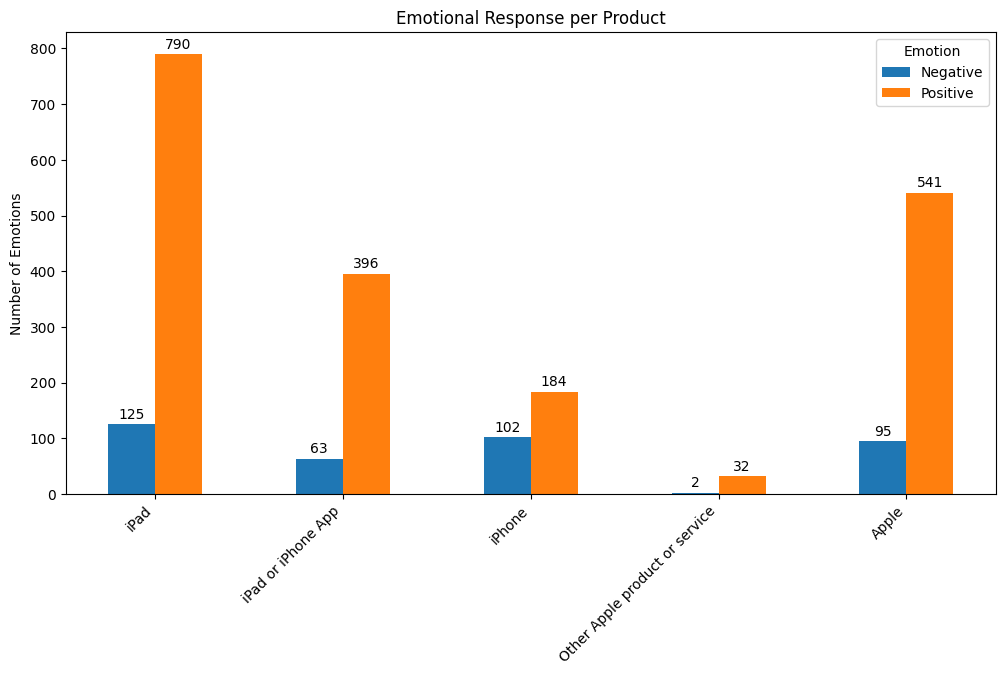

['iPad', 'iPad or iPhone App', 'iPhone', 'Other Apple product or service', 'Apple']


In [88]:
#Separate chart for apple products and no neutral bar

apple_dict = {'iPad': (125, 790), 'iPad or iPhone App': (63, 396), 'iPhone': (102, 184), 'Other Apple product or service': (2, 32), 'Apple': (95, 541)}

apple_products = list(apple_dict.keys())
x = np.arange(len(apple_products))  # the label locations
width = 0.25  # the width of the bars
emotions = ['Negative','Positive']

fig, ax = plt.subplots(figsize=(12, 6))
multiplier = 0

bar_containers = []  # To store bar container objects for the legend

# Create a bar group for each emotion
for i, emotion in enumerate(emotions):
    emotion_values = [apple_dict[product][i] for product in apple_products]
    offset = width * i - (width * (len(emotions)-1) / 2)
    rects = ax.bar(x + offset, emotion_values, width, label=emotion)
    ax.bar_label(rects, padding=2)
    bar_containers.append(rects)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Emotions')
ax.set_title('Emotional Response per Product')
ax.set_xticks(x)
ax.set_xticklabels(apple_products, rotation=45, ha='right')  # Rotate the x-tick labels for better visibility

# Set the legend manually
ax.legend(bar_containers, emotions, title='Emotion')

plt.show()

product_df = pd.DataFrame(product_emotions_dict)
product_df = product_df.transpose()
product_df.head()
positive_percent = (product_df[2] / (product_df[0] + product_df[1] + product_df[2])) * 100
print(apple_products)

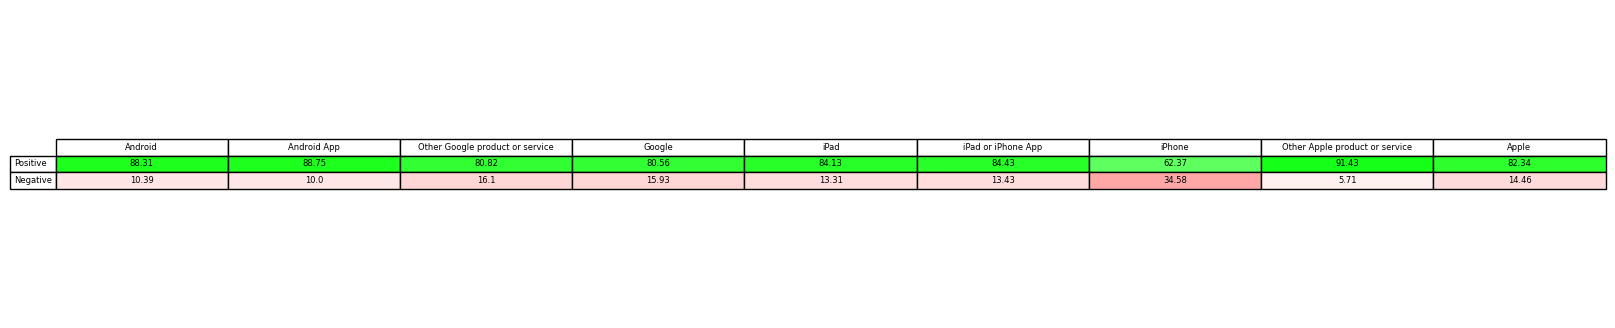

In [89]:
#Table displaying percentages of positive vs. negative emotion with color coding
#Note that percentages don't add up to 100% because we're not including neutral emotions

product_df = pd.DataFrame(product_emotions_dict)
product_df = product_df.transpose()

products_list = list(product_emotions_dict.keys())
positive_percent = (product_df[2] / (product_df[0] + product_df[1] + product_df[2])) * 100
pos_percent = positive_percent.round(2)
negative_percent = (product_df[0] / (product_df[0] + product_df[1] + product_df[2])) * 100
neg_percent = negative_percent.round(2)
data = np.array([pos_percent, neg_percent])

fig, ax = plt.subplots(figsize=(20, 4))
ax.set_axis_off()


table = ax.table(cellText=data, rowLabels=['Positive', 'Negative'], colLabels=products_list, cellLoc = 'center', loc='center')

# Color mapping: more positive = greener, more negative = redder
for i, (pos, neg) in enumerate(zip(pos_percent, neg_percent)):
    pos_color = (1 - pos / 100, 1, 1 - pos / 100)
    neg_color = (1, 1 - neg / 100, 1 - neg / 100)
    table[(1, i)].set_facecolor(pos_color)
    table[(2, i)].set_facecolor(neg_color)
    table[(1, i)].set_text_props(color='black')
    table[(2, i)].set_text_props(color='black')


plt.show()